## Importações

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lendo dataset

In [3]:
df = pd.read_csv('CompanhiaMB.csv')

### Variáveis

- funcionario
- estado_civil
- instrucao
- nfilhos
- salario
- idade_anos
- idade_meses
- regiao

## Estado civil

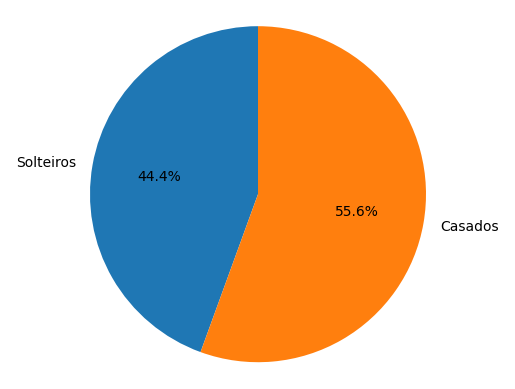

In [14]:
df = pd.read_csv('CompanhiaMB.csv')
solteiros = df[df['estado_civil'] == 'solteiro'].count()['funcionario']
casados = df[df['estado_civil'] == 'casado'].count()['funcionario']

labels = ['Solteiros', 'Casados']
sizes = [solteiros, casados]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


## Grau de Instrução

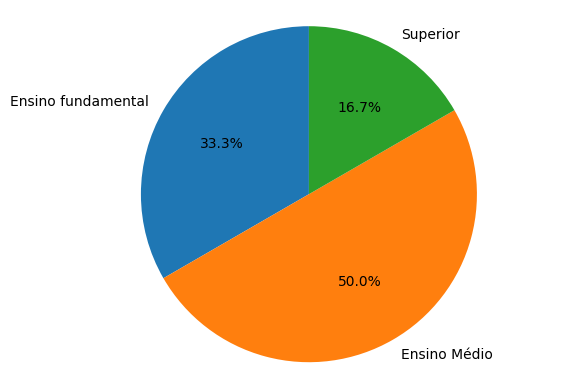

In [15]:
df = pd.read_csv('CompanhiaMB.csv')
ensino_fundamental = df[df['instrucao'] == 'ensino_fundamental'].count()['funcionario']
ensino_medio = df[df['instrucao'] == 'ensino_medio'].count()['funcionario']
superior = df[df['instrucao'] == 'superior'].count()['funcionario']

labels = ['Ensino fundamental', 'Ensino Médio', 'Superior']
sizes = [ensino_fundamental, ensino_medio, superior]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

## Número de Filhos

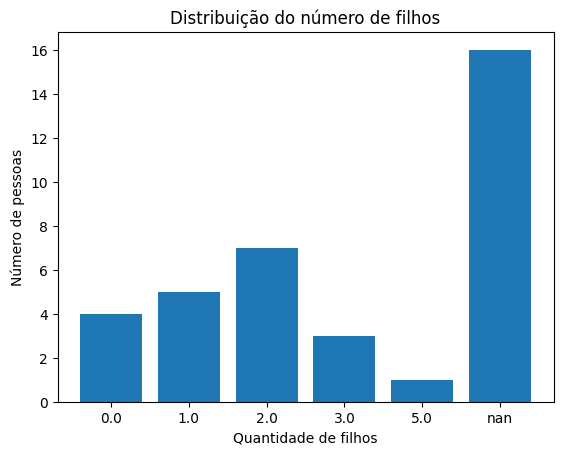

In [17]:
df = pd.read_csv('CompanhiaMB.csv')
filhos = df['nfilhos'].value_counts(dropna=False).sort_index()

plt.bar(filhos.index.astype(str), filhos.values)
plt.xlabel('Quantidade de filhos')
plt.ylabel('Número de pessoas')
plt.title('Distribuição do número de filhos')
plt.show()


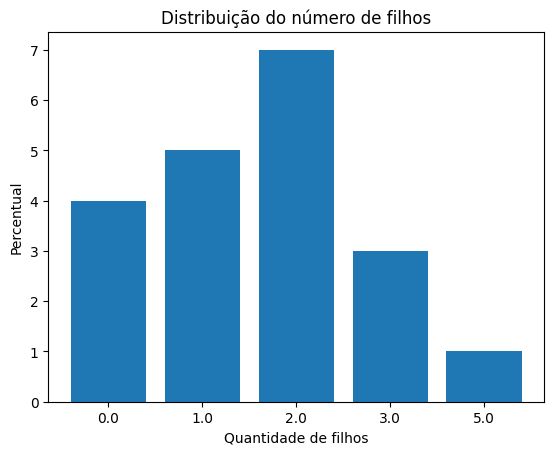

In [27]:
# TIRANDO OS NULOS DO GRÁFICO

df = pd.read_csv('CompanhiaMB.csv')
df.dropna(subset=['nfilhos'], inplace=True)
filhos = df['nfilhos'].value_counts().sort_index()

plt.bar(filhos.index.astype(str), filhos.values)
plt.xlabel('Quantidade de filhos')
plt.ylabel('Percentual')
plt.title('Distribuição do número de filhos')
plt.show()


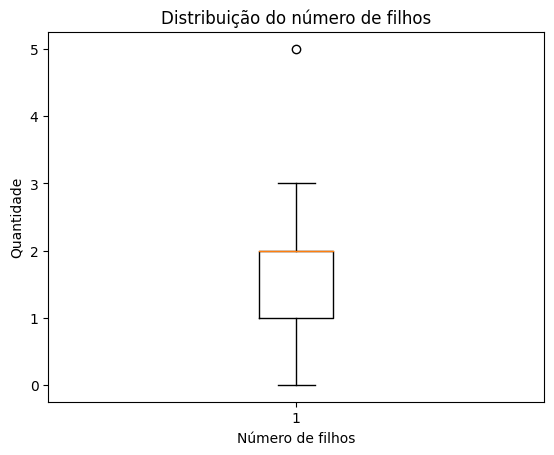

In [31]:
df = pd.read_csv('CompanhiaMB.csv')
df.dropna(subset=['nfilhos'], inplace=True)

fig, ax = plt.subplots()
ax.boxplot(df['nfilhos'])
ax.set_xlabel('Número de filhos')
ax.set_ylabel('Quantidade')
ax.set_title('Distribuição do número de filhos')
plt.show()
